# Red wine Quality - EDA & ML 

FEATURES DESCRIPTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
red_wine=pd.read_csv(r'C:\Users\NICK\Desktop\Red_wine_quality.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape

(1599, 12)

In [7]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Red_wine data set does not have missing values.

In [9]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


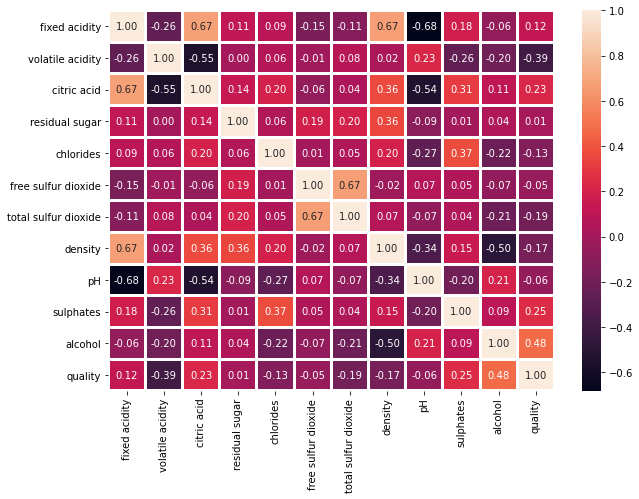

In [12]:
plt.figure(figsize = (10,7,))
corrMatrix=red_wine.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype = bool))
sns.heatmap(corrMatrix,annot=True, fmt = '.2f', linewidths = 2)
plt.show()

Observation:

* Red wine quality-wise analysis

In [14]:
#red wine quality value count
quality_value_count=red_wine["quality"].value_counts()
quality_value_count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

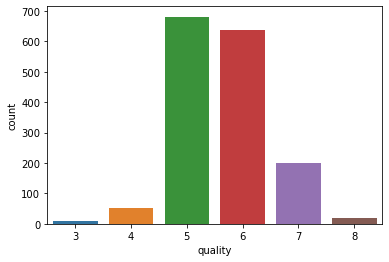

In [15]:
sns.countplot(red_wine['quality'])

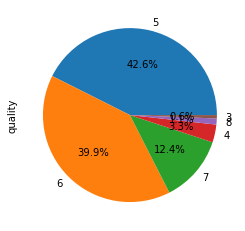

In [16]:
quality_value_count.plot.pie(autopct="%.1f%%")

In [17]:
red_wine.corr()['quality'].nlargest()

quality          1.000000
alcohol          0.476166
sulphates        0.251397
citric acid      0.226373
fixed acidity    0.124052
Name: quality, dtype: float64

* Red wine alcohol-wise analysis

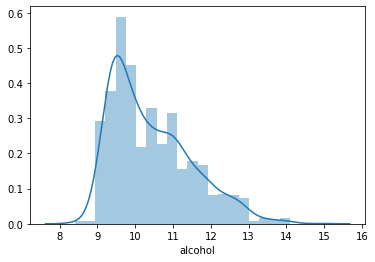

In [19]:
# Lets see how alcohol concentration is distributed with respect to the quality of the red wine.
sns.distplot(red_wine['alcohol'])

In [20]:
from scipy.stats import skew
skew(red_wine['alcohol'])

0.8600210646862129

The output verifies that alcohol is positively skewed.

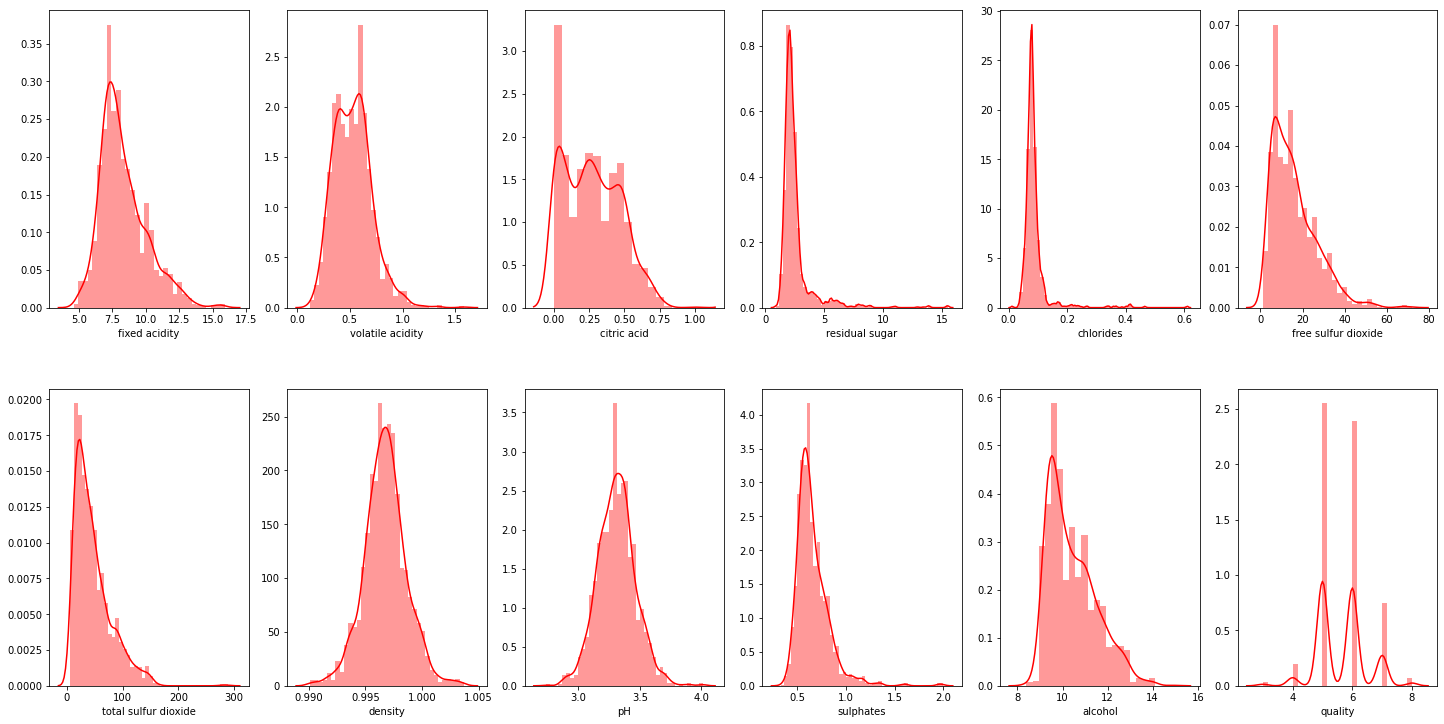

In [21]:
#Dist plot of all features:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in red_wine.items():
    sns.distplot(value, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

The above figures show the distribution of the features. Few of them are normally distributed where other are rightly skewed. The range of each feature is also not huge.

*Alcohol Vs Quality

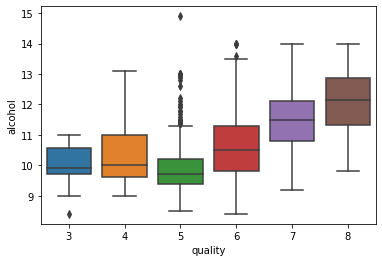

In [22]:
sns.boxplot(x='quality', y='alcohol', data = red_wine)

Above graph showing some dots outside of the graph. Those are outliers. outliers are around wine with quality 5 and 6. We can remove the outliers by passing an argument, showoutliers=False

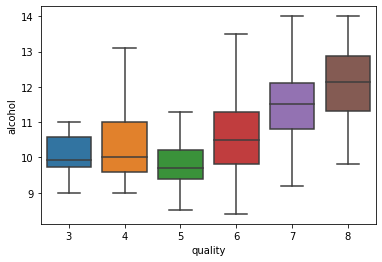

In [23]:
sns.boxplot(x='quality', y='alcohol', data = red_wine, showfliers=False)

The higher the alcohol concentration is, the higher the quality of the wine.

In [24]:
# red wine pH value wise count
red_wine["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
2.95     1
3.74     1
2.87     1
2.90     1
3.70     1
Name: pH, Length: 89, dtype: int64

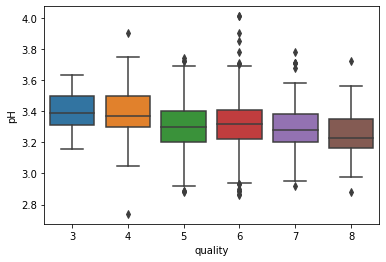

In [25]:
sns.boxplot(x='quality', y='pH', data = red_wine)

Above graph showing some dots outside of the graph. Those are outliers. outliers are around wine with quality 4,5,6,7 AND 8. We can remove the outliers by passing an argument, showoutliers=False

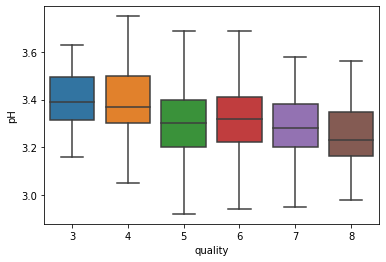

In [27]:
sns.boxplot(x='quality', y='pH', data = red_wine, showfliers=False)

Observation:-
For higher quality of red wine pH value lies between 3.0 to 3.6 range.

# ML algorithm



##Linear Regression 

Dependant variable:- quality

Independant Variable:- fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH sulphates alcohol

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
#droping data that we do not want to find corr
data=red_wine.drop(['quality'],axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
x_train,x_test, y_train, y_test=train_test_split(data,red_wine['quality'],test_size=0.20,random_state=8)

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
accuracy=model.score(x_test,y_test)
print(accuracy*100,'%')

35.885487292590135 %


In [33]:
#Predicting the Test set result;  
y_pred= model.predict(x_test)
y_pred

array([4.90763055, 5.42103168, 5.36023197, 5.38850015, 6.31244846,
       5.3476902 , 6.03068276, 5.46605493, 6.18883345, 5.30313311,
       5.08100001, 5.48163703, 6.00937108, 5.37145356, 5.23212905,
       6.02878553, 6.20463825, 5.28575723, 6.31877797, 5.44450612,
       6.54810155, 5.92079919, 5.14378979, 5.71107258, 5.05643987,
       5.23888012, 5.27084383, 5.38034218, 6.0447671 , 5.3861848 ,
       5.05763551, 5.40338767, 5.83141226, 6.11329402, 4.99530049,
       4.98321932, 5.12858068, 5.12644858, 5.49723931, 5.42617044,
       6.24543056, 5.06646476, 5.56429681, 5.15125573, 6.46337243,
       5.45639805, 5.66351251, 6.12142579, 5.7218691 , 5.37512195,
       5.3559419 , 5.6637108 , 5.54112238, 5.25484132, 5.92901309,
       6.01272678, 5.48333384, 5.01118064, 5.62744481, 6.39584173,
       5.71925231, 5.1000823 , 5.17961589, 5.98265123, 5.82454042,
       5.0662697 , 5.73087869, 5.63729204, 5.79130994, 5.61182353,
       5.04522558, 5.68979557, 5.16215297, 6.54567729, 5.33634

In [34]:
print('Train Score: ', model.score(x_train, y_train))  
print('Test Score: ', model.score(x_test, y_test)) 

Train Score:  0.35789191481062566
Test Score:  0.35885487292590135


In [35]:
#to see what coefficients our regression model has chose
coeff_df = pd.DataFrame(model.coef_,data.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.033986
volatile acidity,-0.989608
citric acid,-0.141347
residual sugar,0.015099
chlorides,-1.162166
free sulfur dioxide,0.005314
total sulfur dioxide,-0.003338
density,-26.168395
pH,-0.376690
sulphates,0.936546


In [36]:
red_wine_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
red_wine_prediction

,Actual,Predicted
145,5,4.907631
345,5,5.421032
603,6,5.360232
319,6,5.388500
1544,7,6.312448
...,...,...
1511,5,5.346181
1308,5,5.252262
441,6,6.170234
805,7,6.730524


Evaluating the Algorithm The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE. Execute the following script:

In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49915504263004545
Mean Squared Error: 0.42553503336390663
Root Mean Squared Error: 0.652330463311278


Observation:-
Accuracy of our red wine quality model by using linear regression is 35%.so here we observed that using linear regression algorithum is not good idea.

There is poor relation between Dependant variable(quality) and Independant Variable(fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH sulphates alcohol)

#Logistic Regression in Machine Learning

Logistic regression predicts the output of a categorical dependent variable.

Dependant variable:- quality (as it is categorize in 5,6,7,4,8,3)

Independant Variable:- fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH sulphates alcohol

In [38]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [39]:
logistic_data=red_wine.drop(['quality'],axis=1)
logistic_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Now we will split the dataset into a training set and test set. Below is the code for it:

In [41]:
x_train,x_test, y_train, y_test=train_test_split(logistic_data,red_wine['quality'],test_size=0.20,random_state=8)

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable

In [42]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

* Fitting Logistic Regression to the Training set:
We have well prepared our dataset, and now we will train the dataset using the training set. For providing training or fitting the model to the training set, we will import the LogisticRegression class of the sklearn library.

After importing the class, we will create a logmodel object and use it to fit the model to the logistic regression. Below is the code for it:

In [43]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* Predicting the Test Result
Our model is well trained on the training set, so we will now predict the result by using test set data. Below is the code for it:

In [44]:
predictions=logmodel.predict(x_test)
x_test

array([[-0.12038405,  0.79961249,  1.4586497 , ..., -0.92259164,
        -0.22809285, -0.97151704],
       [-0.75377343,  0.88265791, -1.38677093, ...,  1.83081473,
         0.92045342, -0.50123244],
       [ 2.81623946, -0.36302342,  1.30344494, ..., -1.37082059,
        -0.59079167, -1.34774472],
       ...,
       [ 2.06768837, -0.69520511,  1.97599891, ..., -1.62695141,
         0.13460597,  0.81556444],
       [-0.0628032 , -1.35956848,  0.68262589, ...,  0.10193166,
         0.25550558,  2.22641823],
       [-0.46586917,  0.30133996,  1.51038462, ..., -0.66646082,
         2.2503491 ,  1.0977352 ]])

In [45]:
#Accuracy of test data
accuracy = logmodel.score(x_test, y_test)
print("Accuracy of Test set",accuracy*100,'%')

Accuracy of Test set 59.06249999999999 %


In [46]:
predictions

array([5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 7, 6,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 4, 5, 6, 7, 6, 5, 6, 5, 7, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 7, 6, 5, 6, 5, 7, 5, 5, 5, 6,
       5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 7, 5,
       6, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 6, 5, 5,
       5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7, 5, 6,
       6, 7, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 3, 6, 5, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5,

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.10      0.18        10
           5       0.65      0.79      0.71       137
           6       0.55      0.55      0.55       129
           7       0.43      0.24      0.31        37
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.44      0.28      0.29       320
weighted avg       0.58      0.59      0.57       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[  0,   0,   3,   1,   0,   0],
       [  0,   1,   7,   2,   0,   0],
       [  1,   0, 108,  27,   1,   0],
       [  0,   0,  49,  71,   9,   0],
       [  0,   0,   0,  28,   9,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [49]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, logmodel.predict(x_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, logmodel.predict(x_train))}")
print(f"Accuracy Score of Test Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.6075058639562158
Accuracy Score of Test Data is 0.590625



# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

Here we are using same data i.e dependant variable is quality .And same training set and test set which we are created above (in linear regression)

we are fitting training set and test set to KNN

In [51]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [52]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
#Accuracy of test data
#accuracy = knn.score(x_test, y_test)
#print("Accuracy score of Test set",accuracy*100,'%')
print(f"Accuracy score of Test Data is {(accuracy_score(y_test, knn.predict(x_test)))*100}",'%')
print(f"Accuracy score of Training Data is {(accuracy_score(y_train, knn.predict(x_train)))*100}",'%')

Accuracy score of Test Data is 60.0 %
Accuracy score of Training Data is 70.99296325254105 %


In [54]:
pred_knn = knn.predict(x_test)
pred_knn

array([5, 5, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 5, 7, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 6, 7, 6, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 7,
       5, 4, 5, 6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 7, 6, 7, 4, 5, 6, 7, 6, 5, 6, 5, 7, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 6, 7, 6, 7, 5,
       5, 7, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5,
       5, 6, 7, 5, 5, 5, 5, 5, 5, 4, 6, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 6,
       6, 6, 5, 7, 6, 5, 6, 7, 4, 5, 5, 7, 6, 3, 6, 5, 5, 5, 6, 7, 5, 6,
       6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 4, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 5, 5,

In [55]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.10      0.13        10
           5       0.66      0.74      0.70       137
           6       0.58      0.57      0.58       129
           7       0.47      0.41      0.43        37
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.32      0.30      0.31       320
weighted avg       0.58      0.60      0.59       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
confusion_matrix(y_test, pred_knn)

array([[  0,   0,   0,   4,   0,   0],
       [  0,   1,   4,   5,   0,   0],
       [  1,   2, 102,  29,   3,   0],
       [  0,   1,  42,  74,  12,   0],
       [  0,   1,   6,  15,  15,   0],
       [  0,   0,   1,   0,   2,   0]], dtype=int64)

Observation:-
Using KNN algorithm on red wine quality data where quality is dependant variable, accuracy of test data is 60%.

# SVM

In [58]:
from sklearn.svm import SVC

Here we are using same data i.e dependant variable is quality .And same training set and test set which we are created above (in linear regression)

After scaling data we are fitting training set and test set to SVC

In [59]:
#SVM
model_svc=SVC()
model_svc.fit(x_train,y_train)
y_train_pred=model_svc.predict(x_train)
y_test_pred=model_svc.predict(x_test)

print("Train set Accuracy :"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test set Accuracy : "+str(accuracy_score(y_test_pred,y_test)*100))

Train set Accuracy :67.47458952306489
Test set Accuracy : 61.25000000000001


Observation:-
Using SVC  algorithm on red wine quality data where quality is dependant variable, accuracy of test data is 61%.

Decision Tree
Here we are using same data i.e dependant variable is quality .And same training set and test set which we are created above (in linear regression)

After scaling data we are fitting training set and test set to SVM

In [60]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
 #accuracy score
print(f"Accuracy score of Test Data is {(accuracy_score(y_test, decision_tree.predict(x_test)))*100}",'%')
print(f"Accuracy score of Training Data is {(accuracy_score(y_train, decision_tree.predict(x_train)))*100}",'%')

Accuracy score of Test Data is 59.06249999999999 %
Accuracy score of Training Data is 100.0 %
